<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/take_all.png" height="400">

# <center> Андан на экономе <br>  <br> Семинар 10: собираем данные в python </center>


## Agenda

* Азы всех азов
* Что делать, если сервер разозлился
* Что такое API
* Что такое Selenium
* Хитрости

# 1. Азы всех азов

Чтобы усвоить азы всех азов, прочитайте [статейку с хабра.](https://habr.com/ru/company/ods/blog/346632/) Там в соавторах один из семинаристов, что как бы намекает на то, что контент годный.

## Зачем собирать данные автоматически?

<br>

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/aaaaaa.png" width="500">

## Что такое HTML?

**HTML (HyperText Markup Language)**  — это такой же язык разметки как Markdown или LaTeX. Он является стандартным для написания различных сайтов. Команды в таком языке называются **тегами**. Если открыть абсолютно любой сайт, нажать на правую кнопку мышки, а после нажать `View page source`, то перед вами предстанет HTML скелет этого сайта.

HTML-страница это ни что иное, как набор вложенных тегов. Можно заметить, например, следующие теги:

- `<title>` – заголовок страницы
- `<h1>…<h6>` – заголовки разных уровней
- `<p>` – абзац (paragraph)
- `<div>` – выделения фрагмента документа с целью изменения вида содержимого
- `<table>` – прорисовка таблицы
- `<tr>` – разделитель для строк в таблице
- `<td>` – разделитель для столбцов в таблице
- `<b>` – устанавливает жирное начертание шрифта

Обычно команда `<...>` открывает тег, а  `</...>` закрывает его. Все, что находится между этими двумя командами, подчиняется правилу, которое диктует тег. Например, все, что находится между `<p>` и  `</p>` — это отдельный абзац.   

Теги образуют своеобразное дерево с корнем в теге `<html>` и разбивают страницу на разные логические кусочки. У каждого тега есть свои потомки (дети) — те теги, которые вложены в него и свои родители.

Например, HTML-древо страницы может выглядеть вот так:


````
<html>
<head> Заголовок </head>
<body>
    <div>
        Первый кусок текста со своими свойствами
    </div>
    <div>
        Второй кусок текста
            <b>
                Третий, жирный кусок
            </b>
    </div>
    Четвёртый кусок текста
</body>
</html>
````

Можно работать с этим html как с текстом, а можно как с деревом. Обход этого дерева и есть парсинг веб-страницы. Мы всего лишь будем находить нужные нам узлы среди всего этого разнообразия и забирать из них информацию!

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/tree.png" width="450">

## Качаем цены на книги

* Хотим собрать [цены на книги](http://books.toscrape.com)
* Руками долго, напишем код на петухоне

Доступ к веб-станицам позволяет получать модуль requests. Подгрузим его. Если у вас не установлен этот модуль, то придётся напрячься и установить:  `pip install requests`.

In [1]:
# !pip install requests

In [1]:
import requests

url = 'http://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
response

<Response [200]>

Благословенный 200 ответ - соединение установлено и данные получены, всё чудесно! Если попытаться перейти на несуществующую страницу, то можно получить, например, знаменитую ошибку 404.

In [20]:
requests.get('http://books.toscrape.com/big_scholarship')

<Response [404]>

Внутри response лежит html-разметка странички, которую мы парсим.

In [21]:
response.text[:1000]

'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" 

Выглядит неудобоваримо, как насчет сварить из этого дела что-то покрасивее? Например, прекрасный суп.

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/alisa.jpg" height="200" width="200">

Пакет **[`bs4`](https://www.crummy.com/software/BeautifulSoup/)**, a.k.a **BeautifulSoup** был назван в честь стишка про красивый суп из Алисы в стране чудес. Эта совершенно волшебная библиотека, которая из сырого и необработанного HTML (или XML) кода страницы выдаст вам структурированный массив данных, по которому очень удобно искать необходимые теги, классы, атрибуты, тексты и прочие элементы веб страниц.

> Пакет под названием `BeautifulSoup` — скорее всего, не то, что вам нужно. Это третья версия (*Beautiful Soup 3*), а мы будем использовать четвертую. Так что нам нужен пакет `beautifulsoup4`. Чтобы было совсем весело, при импорте нужно указывать другое название пакета — `bs4`, а импортировать функцию под названием `BeautifulSoup`. В общем, сначала легко запутаться, но эти трудности нужно преодолеть однажды, а потом будет проще.

In [2]:
from bs4 import BeautifulSoup

# распарсили страничку в дерево
tree = BeautifulSoup(response.content, 'html.parser')

In [23]:
tree


<!DOCTYPE html>

<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:30" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="../static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="../static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link 

Внутри переменной `tree` теперь лежит дерево из тегов, по которому мы можем совершенно спокойно бродить.

In [26]:
tree.title

<title>
    All products | Books to Scrape - Sandbox
</title>

In [6]:
tree.title.text.strip()

'All products | Books to Scrape - Sandbox'

Можно вытащить из того места, куда мы забрели, текст с помощью метода `text`.

In [7]:
tree.html.head.title.text

'\n    All products | Books to Scrape - Sandbox\n'

С текстом можно работать классическими питоновскими методами. Например, можно избавиться от лишних отступов.

In [8]:
tree.html.head.title.text.strip()

'All products | Books to Scrape - Sandbox'

Более того, зная адрес элемента, мы сразу можем найти его. Например, вот так в коде страницы мы можем найти где именно для каждой книги лежит основная информация. Видно, что она находится внутри тега `article`, для которого прописан класс `product_pod` (грубо говоря, в html класс задаёт оформление соотвествующего кусочка страницы).

Вытащим инфу о книге из этого тега.

In [28]:
books = tree.find_all('article', {'class' : 'product_pod'})
books[0]

<article class="product_pod">
<div class="image_container">
<a href="a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

Полученный после поиска объект также обладает структурой bs4. Поэтому можно продолжить искать нужные нам объекты уже в нём.

In [31]:
type(books[0])

bs4.element.Tag

In [33]:
books[0].find('p', {'class': 'price_color'}).text

'£51.77'

Обратите внимание, что для поиска есть как минимум два метода: `find` и `find_all`. Если несколько элементов на странице обладают указанным адресом, то метод `find` вернёт только самый первый. Чтобы найти все элементы с таким адресом, нужно использовать метод `find_all`. На выход будет выдан список.

Кроме содержимого у тегов часто есть атрибуты. Например, у названия книги есть атрибуты `title` и `href` (гипертекстовая ссылка):

In [34]:
books[0].h3

<h3><a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>

Их тоже можно вытащить.

In [35]:
books[0].h3.a.get('href')

'a-light-in-the-attic_1000/index.html'

In [36]:
books[0].h3.a.get('title')

'A Light in the Attic'

А ещё по этим атрибутам можно искать интересующие нас кусочки страницы.

In [37]:
tree.find_all('a', {'title': 'A Light in the Attic'})

[<a href="a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>]

Собственно говоря, это всё.

Обратите внимание, что на сайте все книги лежат на разных страничках. Если попробовать потыкать их, можно заметить, что в ссылке будет меняться атрибут `page`. Значит, если мы хотим собрать все книги, надо создать кучу ссылок с разным `page` внутри цикла. Когда качаешь данные с более сложных сайтов, в ссылке часто есть огромное количество атрибутов, которые регулируют выдачу.

Давайте запишем весь код для сбора книг в виде функции. На вход она будет принимать номер странички, которую надо скачать.

In [ ]:
'http://books.toscrape.com/catalogue/page-{}.html'.format(p)
f'http://books.toscrape.com/catalogue/page-{p}.html'

In [38]:
def get_page(p):

    # изготовили ссылку
    url = 'http://books.toscrape.com/catalogue/page-{}.html'.format(p)

    # сходили по ней
    response = requests.get(url)

    # построили дерево
    tree = BeautifulSoup(response.content, 'html.parser')

    # нашли в нём всё самое интересное
    books = tree.find_all('article', {'class' : 'product_pod'})

    infa = [ ]

    for book in books:
        infa.append({'price': book.find('p', {'class': 'price_color'}).text,
                     'href': book.h3.a.get('href'),
                     'title': book.h3.a.get('title')})

    return infa

Осталось только пройтись по всем страничкам от page-1 до page-50 циклом и данные у нас в кармане.

In [39]:
infa = []

for p in range(1,51):
    infa.extend(get_page(p))

In [19]:
import pandas as pd

df = pd.DataFrame(infa)
print(df.shape)
df.head()

(1000, 3)


,price,href,title
0,£51.77,a-light-in-the-attic_1000/index.html,A Light in the Attic
1,£53.74,tipping-the-velvet_999/index.html,Tipping the Velvet
2,£50.10,soumission_998/index.html,Soumission
3,£47.82,sharp-objects_997/index.html,Sharp Objects
4,£54.23,sapiens-a-brief-history-of-humankind_996/index...,Sapiens: A Brief History of Humankind


Кстати говоря, если перейти по ссылке в саму книгу, там о ней будет куча дополнительной информации. Можно пройтись по всем ссылкам и выкачать себе по ним дополнительную информацию.

# 2. Что делать, если сервер разозлился

* Вы решили собрать себе немного данных
* Сервер не в восторге от ковровой бомбардировки автоматическими запросами
* Error 403, 404, 504, $\ldots$
* Капча, требования зарегистрироваться
* Заботливые сообщения, что с вашего устройства обнаружен подозрительный трафик

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/doge.jpg" width="450">

## а) быть терпеливым

* Слишком частые запросы раздражают сервер
* Ставьте между ними временные задержки

In [40]:
import time
time.sleep(3) # и пусть весь мир подождёт 3 секунды

## б) быть похожим на человека


Запрос нормального человека через браузер выглядит так:

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/browser_get.png" width="600">
    
С ним на сервер попадает куча информации! Запрос от питона выглядит так:


<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/python_get.jpg" width="250">

Заметили разницу?  Очевидно, что нашему скромному запросу не тягаться с таким обилием мета-информации, которое передается при запросе из обычного браузера. К счастью, никто нам не мешает притвориться человечными и пустить пыль в глаза сервера при помощи генерации фейкового юзер-агента. Библиотек, которые справляются с такой задачей, существует очень и очень много, лично мне больше всего нравится [fake-useragent.](https://pypi.org/project/fake-useragent/) При вызове метода из различных кусочков будет генерироваться рандомное сочетание операционной системы, спецификаций и версии браузера, которые можно передавать в запрос:

In [21]:
# !pip install fake_useragent

  Obtaining dependency information for fake_useragent from https://files.pythonhosted.org/packages/e4/99/60d8cf1b26938c2e0a57e232f7f15641dfcd6f8deda454d73e4145910ff6/fake_useragent-1.5.1-py3-none-any.whl.metadata


In [41]:
from fake_useragent import UserAgent
UserAgent().chrome

'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'

Например, https://knowyourmeme.com/ не захочет пускать к себе python и выдаст ошибку 403. Она выдается сервером, если он доступен и способен обрабатывать запросы, но по некоторым личным причинам отказывается это делать.

In [42]:
url = 'https://knowyourmeme.com/'

response = requests.get(url)
response

<Response [200]>

А если сгенерировать User-Agent, вопросов у сервера не возникнет.

In [43]:
response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
response

<Response [200]>

__Другой пример:__ если захотите спарсить ЦИАН, он начнет вам выдавать капчу. Один из вариантов обхода: менять ip через тор. Однако на практически каждый запрос из-под тора, ЦИАН будет выдавать капчу. Если добавить в запрос `User_Agent`, то капча будет вылезать намного реже.

## в) общаться через посредников

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/proxy.jpeg" width="400">

Посмотрим на свой ip-адрес без прокси.

In [ ]:
r = requests.get('https://httpbin.org/ip')
print(r.json())

{'origin': '34.125.68.50'}


А теперь попробуем посмотреть, что будет если подключить прокси.

In [ ]:
proxies = {
    'http': '182.53.206.47:47592',
    'https': '182.53.206.47:47592'
}

r = requests.get('https://httpbin.org/ip', proxies=proxies)

print(r.json())

ProxyError: HTTPSConnectionPool(host='httpbin.org', port=443): Max retries exceeded with url: /ip (Caused by ProxyError('Unable to connect to proxy', ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7934870a6500>, 'Connection to 182.53.206.47 timed out. (connect timeout=None)')))

Запрос работал немного подольше, ip адрес сменился. Большая часть проксей, которые вы найдёте работают криво. Иногда запрос идёт очень долго и выгоднее сбросить его и попробовать другую проксю. Это можно настроить опцией `timeout`.  Например, так если сервер не будет отвечать секунду, код упадёт.

In [ ]:
import requests
requests.get('http://www.google.com', timeout=1)

<Response [200]>

У requests есть довольно много разных интересных примочек. Посмотреть на них можно в [гайде из документации.](https://requests.readthedocs.io/en/master/user/advanced/)


__Где можно попытаться раздобыть списки прокси:__

* https://qna.habr.com/q/591069
* https://getfreeproxylists.blogspot.com/
* Большая часть бесплатных прокси обычно не работает. Платные обычно продают куче людей и они тоже быстро тухнут. Пишите парсер, который будет собирать списки из проксей и пытаться применить их.

## г) уходить глубже

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/tor.jpg" width="600">

Можно попытаться обходить злые сервера через тор. Есть аж несколько способов, но мы про это говорить не будем. Лучше подробно почитать в нашей статье на Хабре. Ссылка на неё в конце тетрадки. Ещё в самом начале была. А ещё в середине [наверняка есть.](https://habr.com/ru/company/ods/blog/346632/)

## Совместить всё?

1. Начните с малого
2. Если продолжает банить, накидывайте новые примочки
3. Каждая новая примочка бьёт по скорости
4. [Разные примочки для requests](http://docs.python-requests.org/en/v0.10.6/user/advanced/)

# 3. API

__API (Application Programming Interface__ — это уже готовый код, который можно всунуть в свой код! Многие сервисы, в том числе Google и Вконтакте, предоставляют свои уже готовые решения для вашей разработки.

Примеры:

* [Контактовский API](https://vk.com/dev/methods)
* [API twitter](https://developer.twitter.com/en/docs.html)
* [API youtube](https://developers.google.com/youtube/v3/)
* [API google maps](https://developers.google.com/maps/documentation/)
* [Aviasales](https://www.aviasales.ru/API)
* [Yandex Translate](https://yandex.ru/dev/translate/)

Оно есть почти везде! На этом семинаре мы посмотрим на два примера: на API контакта и google maps.

## 3.1 API vk

> Правила работы с API vk могли измениться. Пайплайн ровно тот же, но токен может добываться иначе. Читайте об этом подробнее документацию.

Зачем может понадобиться доступ к API контакта, думаю, объяснять не надо. Социальная сетка — это тонны различной полезной информации, которую можно заиспользовать для своего рисёрча. [В документации](https://vk.com/dev/manuals) очень подробно описано как можно работать с API контакта и к чему это приводит.

Но для начала к API нужно получить доступ. Для этого придётся пройти пару бюрократических процедур (о, боже, эти два предложения были так бюрократически сформулированы, что мне захотелось отстоять в очереди).

Первая такая процедура заключается в создании своего приложения. Для этого переходим по [ссылке](http://vk.com/editapp?act=create) и проходимся по необходимым шагам:

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_1.png" width="500">

После подтверждения своей личности по номеру телефона, попадаем на страницу свежесозданного приложения

<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_2.png" width="500">

Слева нам будем доступна вкладка с настройками, перейдя в неё мы увидим все необходимые нам для работы с приложением параметры:
<img align="center" src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem05_parsing/image/app_creation_3.png" width="500">

Отсюда в качестве токена можно забрать сервисный ключ доступа. Для работы с частью методов API этого вполне достаточно (обычно в заголовке такого метода стоит соответствующая пометка). Иногда нужны дополнительные доступы. Для того, чтобы получить их, необходимо сделать ещё пару странных манипуляций:

Переходим по ссылке вида (на месте звездочек должен стоять ID созданного вами приложения):

> https://oauth.vk.com/authorize?client_id=**********&scope=8198&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token

В итоге по этому запросу будет сформирована ссылка следующего вида:
> https://oauth.vk.com/blank.html#access_token=25b636116ef40e0718fe4d9f382544fc28&expires_in=86400&user_id=*******

Первый набор знаков — `access token`, т.е. маркер доступа. Вторая цифра (`expires_in=`) время работы маркера доступа в секундах (одни сутки). По истечению суток нужно будет получить новый маркер доступа. Последняя цифра (`user_id=`) ваш ID Вконтакте. Нам в дальнейшем понадобится маркер доступа. Для удобства сохраним его в отдельном файле или экспортируем в глобальную область видимости. В целях безопасности ваших данных не стоит нигде светить токенами и тем более выкладывать их в открытый доступ. __Так можно и аккаунта случайно лишиться.__ Берегите токен смолоду.

Обратите внимание на ссылку, по которой мы делали запрос на предоставление токена. Внутри неё находится странный параметр `scope=8198.` Это мы просим доступ к конкретным разделам. Подробнее познакомиться с взаимно-однозначным соответствием между числами и правами можно [в документации.](https://vk.com/dev/permissions) Например, если мы хотим получить доступ к друзьям, фото и стенам, мы подставим в scope цифру $2 + 4 + 8192 = 8198.$

In [44]:
# мой номер странички
myid = 'soroktani'  # вставить номер странички

# версия используемого API
version = '5.103'

# подгружаем токен из файлика на компьютере
with open('secret_token.txt') as f:
    token = f.read()

Чтобы скачать что-то из контакта, надо сделать ссылку и сходить по ней пакетом `requests`. Ссылка должна будет включать в себя метод (что мы просим у вк) и параметры (насколько много и как именно). Мы будем просто заменять эти две штуки и выкачивать разные вещи.

In [45]:
method = 'users.get'
parameters = 'user_ids=soroktani'

url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token

response = requests.get(url)
response.json()

{'response': [{'id': 170554662,
   'first_name': 'Tatiana',
   'last_name': 'Sorokina',
   'can_access_closed': True,
   'is_closed': False}]}

В ответ на наш запрос vk выкидывает JSON с информацией. JSON очень похож на птонячие словарики. Смысл квадратных и фигурных скобок такой же. Правда, есть и отличия: например, в Python одинарные и двойные кавычки ничем не отличаются, а в JSON можно использовать только двойные.

Мы видим, что полученный нами JSON представляет собой словарь, значения которого — строки или числа, а также списки или словари, значения которых в свою очередь также могут быть строками, числами, списками, словарями и т.д. То есть получается такая довольно сложная структура данных, из которой можно вытащить всё то, что нас интересует.

In [47]:
response.json()['response'][0]['first_name']

'Tatiana'

[В документации](https://vk.com/dev/manuals) очень подробно описано какие есть методы и какие у них бывают параметры.  Давайте завернём код выше в функцию и попробуем что-нибудь скачать.

In [48]:
def vk_download(method, parameters):

    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url)
    infa = response.json()
    return infa

Например, все лайки с [хайер скул оф мемс.](https://vk.com/hsemem)

In [50]:
group_id = '-139105204'  # взяли из ссылки на группу

In [56]:
wall = vk_download('wall.get', 'owner_id={}&count=100'.format(group_id))
wall = wall['response']

In [52]:
wall['items'][0]

{'inner_type': 'wall_wallpost',
 'is_pinned': 1,
 'comments': {'can_post': 0, 'count': 5, 'groups_can_post': True},
 'marked_as_ads': 0,
 'hash': '8kk1aZWud4if4fwbuw',
 'type': 'post',
 'donut_miniapp_url': 'https://vk.com/app51528700#/?owner_id=-139105204&no_badges=1&post_id=99618',
 'attachments': [{'type': 'photo',
   'photo': {'album_id': -7,
    'date': 1701888418,
    'id': 457268772,
    'owner_id': -139105204,
    'access_key': '175cdb95c54ff99fa2',
    'sizes': [{'height': 75,
      'type': 's',
      'width': 50,
      'url': 'https://sun9-1.userapi.com/impg/CEHFForTve7BMU8TyIbqv0D3Tfz5PHrTECvLGQ/Xz_qFSUym30.jpg?size=50x75&quality=95&sign=74cac38a460846ffa8cc1cfd97faa2f7&c_uniq_tag=XOKBuEgewyoemtcGHCmMCy2UlGl4MRcyjXMsDJ_Cr9c&type=album'},
     {'height': 130,
      'type': 'm',
      'width': 87,
      'url': 'https://sun9-1.userapi.com/impg/CEHFForTve7BMU8TyIbqv0D3Tfz5PHrTECvLGQ/Xz_qFSUym30.jpg?size=87x130&quality=95&sign=86c2be168c13aef113410ee9493e094c&c_uniq_tag=_DxJwDxps

In [53]:
wall['items'][0]['likes']['count']

507

In [60]:
likes = [item['likes']['count'] for item in wall['items']]
likes[:10]

[507, 25, 244, 210, 287, 9, 190, 828, 556, 227]

За один запрос скачалось всего-лишь $100$ постов с лайками. В паблике их целых

In [58]:
wall['count']

1104

[Документация](https://vk.com/dev/manuals) говорит, что есть параметр `offset`, с помощью которого можно указать какие именно посты из группы нужно скачать. Например, если мы укажем `offset = 100`, скачается вторая сотня. Наше дело за малым: написать цикл.

In [61]:
import time

likes = [ ] # сюда буду сохранять лайки

for offset in range(0, 4800, 100):

    time.sleep(0.4) # вк согласен работать 3 раза в секунду,
                    # между запросами python спит 0.4 секунды

    wall = vk_download('wall.get', 'owner_id={}&count=100&offset={}'.format(group_id, offset))

    likes.extend([item['likes']['count'] for item in wall['response']['items']])

Лайки в наших руках. Можем даже посмотреть на их распределение и попробовать что-то с ними сделать.

In [62]:
len(likes)

1105

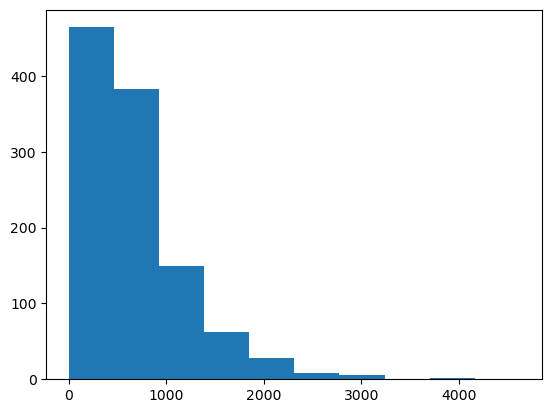

In [94]:
import matplotlib.pyplot as plt
plt.hist(likes);

В принципе похожим образом можно скачать что угодно. Обратите внимание, что у вк есть специальный метод [`execute`,](https://vk.com/dev/execute) который иногда помогает ускорить скачку в $25$ раз. [В этом очень старом туториале](https://github.com/DmitrySerg/OpenData/blob/master/RussianElections2018/Part_1_Parsing_VK.ipynb) даже есть пример использования.

## 3.2 API Google maps

API для карт может понадобиться для различных полугеографических исследований. Например, мы хотим проверить гипотезу о том, что хороший кофе повышает цену квартиры. Одним из регрессоров хотим взять число кофеен в окрестностях. Это количество кофеен надо откуда-то взять. Google maps вам в помощь!

Снова всё начинается с [получения ключа.](https://developers.google.com/maps/documentation/directions/start) Тут всё намного проще. Переходим по ссылке, жмём Get started, соглашаемся со всем, кроме оплаты. Получаем ключ доступа, сохраняем его в файлик рядом с блокнотом.

In [63]:
# подгружаем токен
with open('google_token.txt') as f:
    google_token = f.read()

Формируем ссылку для запроса по заветам [документации](https://developers.google.com/maps/documentation) и получаем ответ в виде JSON.

In [67]:
mainpage = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json?'

# проверить адрес: https://yandex.ru/map-constructor/location-tool/?from=club
# location = '55.86,37.54'

location = '55.75,37.64' # корпус покровки [55.75353156100432,37.64859873019391]
radius = '1000'
keyword = 'кофе'

parameters = 'location='+location+'&radius='+radius+'&keyword='+keyword+'&language=ru-Ru'+'&key='+ google_token

itog_url = mainpage + parameters

In [69]:
response = requests.get(itog_url)

response.json()['results'][0]

{'business_status': 'OPERATIONAL',
 'geometry': {'location': {'lat': 55.7595493, 'lng': 37.6455545},
  'viewport': {'northeast': {'lat': 55.76079707989272,
    'lng': 37.64693842989272},
   'southwest': {'lat': 55.75809742010728, 'lng': 37.64423877010728}}},
 'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/cafe-71.png',
 'icon_background_color': '#FF9E67',
 'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/cafe_pinlet',
 'name': 'кофейня tinē',
 'opening_hours': {'open_now': True},
 'photos': [{'height': 3000,
   'html_attributions': ['<a href="https://maps.google.com/maps/contrib/116247948572858733496">Андрей</a>'],
   'photo_reference': 'ATplDJaGyxB3231TONlZV4aJ2A_LTOqJbB-4_CJ-Is0h6PA6ZyM9WkYkTBLX9JDYPZMFlkHqBGBlisFe2p9hsLPSext22DUlAt7WDk7uacEiufU3dLZxvWpv1iz-xn9UQG3Vvmg2H3QIJdSSLoGONXALba4icnaxWgCCBH60gUs84C5hy4B5',
   'width': 4000}],
 'place_id': 'ChIJq0_hvYpKtUYR1N37n0E2Xmc',
 'plus_code': {'compound_code': 'QJ5W+R6 Басманный р-н, Мо

Из json по сотвествующим ключам тащим самое интересное. Например, названия заведений:

In [70]:
[item['name'] for item in response.json()['results']]

['кофейня tinē',
 'GØG',
 'Кофе Хауз',
 'Coffeewood',
 'Skuratov Coffee roasters',
 'Энигма Кофе',
 'Seadog Coffee Roasters',
 'Surf Coffee',
 'Кофейня DAILY GREEN',
 'ABC Coffee Roasters',
 'Кофеин',
 'Вкусно Кофе',
 'Coffee Place',
 'COFFEE BURO',
 'Кофейня Corner Coffee Roasters',
 'Просвет',
 'Coffee Bean',
 'Кофейня "Gross Coffee"',
 'Бодрый день',
 'Правда кофе']

# 4. Selenium

Это инструмент для роботизированного управления браузером. Для его коректной работы нужно скачать драйвер [для хрома](https://chromedriver.chromium.org/downloads). [Туториал](https://www.youtube.com/watch?v=m4-Z5KqDHpU) по установке драйвера для MacOS.

In [30]:
# !pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/3f/fd/c2e7bb547b5b96c7bd536b4a80c4564b7ce5cd38d10095fbba8648996ab9/selenium-4.18.1-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/17/c9/f86f89f14d52f9f2f652ce24cb2f60141a51d087db1563f3fba94ba07346/trio-0.25.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for typing_extensions>=4.9.0 from https://files.pythonhosted.org/packages/f9/de/dc04a3ea60b22624b51c703a84bbe0184abcd1d0b9bc8074b5d6b7ab90bb/typing_extensions-4.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for attrs>=23.2.0 from https://files.pythonhosted.org/packages/e0/44/827b2a91a5816512fcaf3cc4ebc465ccd5d598c45cefa670

In [36]:
from selenium import webdriver

driver = webdriver.Chrome()

После выполнения верхнего блока у вас откроется ещё один браузер. Можно пойти в нём на стартовую гугла.

In [37]:
ref = 'http://google.com'
driver.get(ref)

Найти по html-коду строку для ввода запроса, кликнуть на неё.

In [38]:
from selenium.webdriver.common.by import By

driver.find_elements(By.CSS_SELECTOR,'[class="QS5gu sy4vM"')[0].click() # reject all cookies
stroka = driver.find_element(By.NAME, "q") # поиск поисковой строки
stroka.click() # перемещение курсора на строку, клик

Написать в неё что-нибудь.

In [39]:
stroka.send_keys('Вконтакте')

Найти кнопку для гугления и нажать её.

In [40]:
# находим кнопку для гугления и жмём её
button = driver.find_element(By.NAME, 'btnK')
button.click()

У нас на стринчке есть поисковая выдача. Заберём её в bs4 и найдём все сайты.

In [76]:
bs = BeautifulSoup(driver.page_source)

dirty_hrefs = bs.find_all('a',attrs={'class':'l'})
clean_hrefs = [href['href'] for href in dirty_hrefs]
clean_hrefs

['https://vk.com/page-777107_28406709',
 'https://vk.com/search',
 'https://vk.com/vk',
 'https://vk.com/settings',
 'https://vk.com/terms']

Закроем браузер.

In [41]:
driver.close()

Вообще selenium придумывали для тестировщиков, а не для парсинга. Для парсеров имеет смысл использовать только в крайнем случае. Он очень медленный. Если у вас очень-очень-очень-очень не получается обмануть сервер через requests или вы сталкиваетесь с какой-то специфической защитой от ботов, seleium может помочь. Ещё для selenium __важно__ не забывать ставить временные задержки, чтобы страница успевала прогрузиться. Либо можно дописывать полноценные код, который будет ждать прогрузки и только тогда тыкать на кнопки и тп.

В моей практике такой подход был полезен в следующих кейсах:

* Надо было скачать много инфы о поисковых запросах из [Google Trends,](https://trends.google.ru/trends/?geo=RU) а API сильно ограничивал меня.
* Надо было понять через поисковик какой у различных организаций ИНН по их наименованию (помогло только для крупных компаний)
* Надо было парсить ЛМС вроде anytask

# 5. Хитрости:

### Хитрость 1:  Не стесняйтесь пользоваться `try-except`

Эта конструкция позволяет питону в случае ошибки сделать что-нибудь другое либо проигнорировать её. Например, мы хотим найти логарифм от всех чисел из списка:

In [78]:
from math import log

a = [1,2,3,-1,-5,10,3]

for item in a:
    print(log(item))

0.0
0.6931471805599453
1.0986122886681098


ValueError: math domain error

У нас не выходит, так как логарифм от отрицательных чисел не берётся. Чтобы код не падал при возникновении ошибки, мы можем его немного изменить:

In [69]:
from math import log

a = [1,2,3,-1,-5,10,3]

for item in a:
    try:
        print(log(item))  # попробуй взять логарифм
    except:
        print('я не смог') # если не вышло, сознайся и работай дальше

0.0
0.6931471805599453
1.0986122886681098
я не смог
я не смог
2.302585092994046
1.0986122886681098


__Как это использовать при парсинге?__  Интернет создаёт человек. У многих людей руки очень кривые. Предположим, что мы на ночь поставили парсер скачивать цены, он отработал час и упал из-за того, что на како-нибудь одной странице были криво проставлены теги, либо вылезло какое-то редкое поле, либо вылезли какие-то артефакты от старой версии сайта, которые не были учтены в нашем парсере. Гораздо лучше, чтобы код проигнорировал эту ошибку и продолжил работать дальше.

### Хитрость 2:  pd.read_html

Если на странице, которую вы спарсили, среди тэгов `<tr>` и `<td>` прячется таблица, чаще всего можно забрать её себе без написания цикла, который будет перебирать все стобцы и строки. Поможет в этом `pd.read_html`. Например, вот так можно забрать себе [табличку с сайта ЦБ](https://cbr.ru/currency_base/daily/)

In [71]:
import pandas as pd

df = pd.read_html('https://cbr.ru/currency_base/daily/')[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,604292
1,944,AZN,1,Азербайджанский манат,544775
2,51,AMD,100,Армянских драмов,232833
3,933,BYN,1,Белорусский рубль,285354
4,975,BGN,1,Болгарский лев,516464


Команда пытается собрать в массив все таблички c веб-страницы. Если хочется, можно сначала через bs4 найти нужную таблицу, а потом уже распарсить её:

In [72]:
resp = requests.get('https://cbr.ru/currency_base/daily/')
tree = BeautifulSoup(resp.content, 'html.parser')

# нашли табличку
table = tree.find_all('table', {'class' : 'data'})[0]

# распарсили её
df = pd.read_html(str(table))[0]
df.head()

,Цифр. код,Букв. код,Единиц,Валюта,Курс
0,36,AUD,1,Австралийский доллар,604292
1,944,AZN,1,Азербайджанский манат,544775
2,51,AMD,100,Армянских драмов,232833
3,933,BYN,1,Белорусский рубль,285354
4,975,BGN,1,Болгарский лев,516464


### Хитрость 3:  используйте пакет tqdm

> Код уже работает час. Я вообще без понятия когда он закончит работу. Было бы круто узнать, сколько ещё ждать...

Если в вашей голове возникла такая мысль, пакет `tqdm` ваш лучший друг. Установите его: ```pip install tqdm```

In [79]:
from tqdm import tqdm_notebook

a = list(range(30))

# 30 раз будем спать по секунде
for i in tqdm_notebook(a):
    time.sleep(1)

C:\Users\Alex\AppData\Local\Temp\ipykernel_4484\1596546638.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(a):


  0%|          | 0/30 [00:00<?, ?it/s]

Мы обмотали тот вектор, по которому идёт цикл в `tqdm_notebook`. Это даёт нам красивую зелёную строку, которая показывает насколько сильно мы продвинулись по коду. Обматывайте свои самые большие и долгие циклы в `tqdm_notebook` и всегда понимайте сколько осталось до конца.

### Хитрость 4:  распаралеливание

Если сервер не очень настроен вас банить, можно распаралелить свои запросы к нему. Самый простой способ сделать это — библиотека `joblib`.

In [74]:
from joblib import Parallel, delayed
from tqdm import tqdm_notebook

def simple_function(x):
    return x**2


nj = -1 # паралель на все ядра
result = Parallel(n_jobs=nj)(
                delayed(simple_function)(item)          # какую функцию применяем
                for item in tqdm_notebook(range(10)))   # к каким объектам применям

# tqdm_notebook в последней строчке будет создавать зелёный бегунок с прогрессом

C:\Users\Alex\AppData\Local\Temp\ipykernel_11912\555554347.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for item in tqdm_notebook(range(10)))   # к каким объектам применям


  0%|          | 0/10 [00:00<?, ?it/s]

На самом деле это не самый эффективный способ паралелить в python. Он жрёт много памяти и работает медленнее, чем [стандартный multiprocessing.](https://docs.python.org/3/library/multiprocessing.html) Но зато две строчки, КАРЛ! Две строчки!

### Хитрость 5:  selenium без браузера

Селениум можно настроить так, чтобы физически браузер не открывался.

In [76]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.headless = True
driver = webdriver.Chrome(options=options)

ref = 'http://google.com'
driver.get(ref)

driver.close()

###  Ещё хитрости:

* __Сохраняйте то, что парсите по мере скачки!__ Прямо внутрь цикла запихните код, который сохраняет файл!
* Когда код упал в середине списка для скачки, не обязательно запускать его с самого начала. Просто сохраните тот кусок, который уже скачался и дозапустите код с места падения.
* Засовывать цикл для обхода ссылок внутрь функции - не самая хорошая идея. Предположим, что надо обойти $100$ ссылок. Функция должна вернуть на выход объекты, которые скачались по всему этому добру. Она берёт и падает на $50$ объекте. Конечно же то, что уже было скачано, функция не возвращает. Всё, что вы накачали - вы теряете. Надо запускать заново. Почему? Потому что внутри функции своё пространство имён. Если бы вы делали это циклом влоб, то можно было бы сохранить первые $50$ объектов, которые уже лежат внутри листа, а потом продолжить скачку.
* Можно ориентироваться на html-страничке с помощью `xpath`. Он предназначен для того, чтобы внутри html-странички можно было быстро находить какие-то элементы. [Подробнее можно почитать тут.](https://devhints.io/xpath)
* Не ленитесь листать документацию. Из неё можно узнать много полезных штук.

# 6. Почиташки

* [Парсим мемы в python](https://habr.com/ru/company/ods/blog/346632/) - подробная статья на Хабре, по которой можно научиться ... парсить (ВНЕЗАПНО)
* [Тетрадки Ильи Щурова](https://github.com/ischurov/pythonhse) про python для анализа данных. В [лекции 9](https://nbviewer.jupyter.org/github/ischurov/pythonhse/blob/master/Lecture%209.ipynb) и [лекции 10](https://nbviewer.jupyter.org/github/ischurov/pythonhse/blob/master/Lecture%2010.ipynb) есть про парсеры.
* [Книга про парсинг](https://github.com/FUlyankin/Parsers/blob/master/Ryan_Mitchell_Web_Scraping_with_Python-_Collecting_Data_from_the_Modern_Web_2015.pdf) на случай если вам совсем скучно и хочется почитать что-то длинное и на английском
* [Продвинутое использование requests](https://2.python-requests.org/en/master/user/advanced/)
* [Перевод документации по selenium на русский на хабре](https://habr.com/ru/post/248559/)